In [33]:
#Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
# To avoid FutureWarning error message. 
import warnings
warnings.filterwarnings('ignore')
#import dataset and view
mb = pd.read_csv('/Users/manasbabbar/Downloads/ALYPredictive/letters.csv')


mb.head(5)

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0


In [5]:
#dataset stat-calculations
mb.describe()

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
count,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000
mean,4.456643,0.171357,0.164476,1.192833,28.043952,36.084976,42.713952,46.092310,44.542452,38.948524,...,42.461048,102.124119,107.683952,79.750548,56.31481,39.244643,25.754262,14.858619,5.844476,0.829643
std,2.887730,5.726352,5.515774,14.692403,70.505431,78.631145,84.390533,87.287033,85.740313,81.223946,...,85.090524,110.961953,111.360981,104.287852,94.20847,82.799118,69.597297,54.018163,33.293343,11.818307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,39.000000,60.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,29.000000,21.000000,0.000000,...,10.000000,247.000000,250.000000,191.000000,86.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000


In [6]:
#looking at null values if any and datatype
mb.info()
#non-null count also gives us info about null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   label     42000 non-null  int64
 1   pixel43   42000 non-null  int64
 2   pixel44   42000 non-null  int64
 3   pixel92   42000 non-null  int64
 4   pixel124  42000 non-null  int64
 5   pixel125  42000 non-null  int64
 6   pixel126  42000 non-null  int64
 7   pixel127  42000 non-null  int64
 8   pixel128  42000 non-null  int64
 9   pixel129  42000 non-null  int64
 10  pixel130  42000 non-null  int64
 11  pixel131  42000 non-null  int64
 12  pixel132  42000 non-null  int64
 13  pixel133  42000 non-null  int64
 14  pixel134  42000 non-null  int64
 15  pixel135  42000 non-null  int64
 16  pixel136  42000 non-null  int64
 17  pixel137  42000 non-null  int64
 18  pixel138  42000 non-null  int64
 19  pixel146  42000 non-null  int64
 20  pixel147  42000 non-null  int64
 21  pixel148  42000 non-null  int64
 22

In [7]:
#Checking for Dupilicate Data
mb.duplicated().sum()

1633

In [8]:
#Droping Duplicates
mb = mb.drop_duplicates()

In [9]:
#Checking for Dupilicate Data Again
mb.duplicated().sum()

0

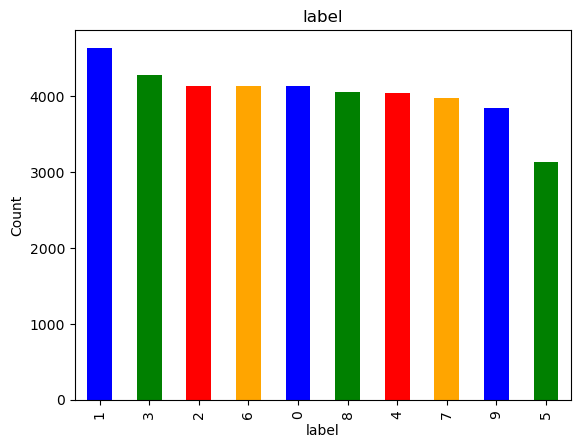

In [10]:
#Barplot for Target Column
mb['label'].value_counts().plot(kind='bar',color=['blue', 'green', 'red', 'orange'])
plt.title('label')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

In [11]:
# Split the data into training and testing sets

X = mb.drop(columns=["label"])
y = mb["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the KNN model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6563041862769383


In [18]:
#Confusion Matrix
knn_predict = knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, knn_predict))
print(classification_report(y_test,knn_predict))

[[766   1  27   4  14   3  23  15   2   9]
 [  0 855   8   5   6   7   7   3  10   1]
 [ 57  18 532  79  17   8  25  32  53  19]
 [ 13  29 119 496  17  35   6  23  85  33]
 [ 22  74   8  14 413  25  18 154  13  82]
 [ 10  22  20 115  27 290  39  36  15  47]
 [ 23  18  21  10  10  20 699   0   3   0]
 [ 10   5   7  13  48  21   1 497  10 160]
 [ 13  68  86 105  14  38  17  32 408  30]
 [ 21  11   8  24  30  26   0 288  30 343]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       864
           1       0.78      0.95      0.85       902
           2       0.64      0.63      0.63       840
           3       0.57      0.58      0.58       856
           4       0.69      0.50      0.58       823
           5       0.61      0.47      0.53       621
           6       0.84      0.87      0.85       804
           7       0.46      0.64      0.54       772
           8       0.65      0.50      0.57       811
           9       0.47     

In [24]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error(MSE):%.2f' % mean_squared_error(knn_predict, y_test))

Mean Squared Error(MSE):5.00


In [12]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,max_depth=20)   
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [13]:
#Accuracy

zrf_predict = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,zrf_predict)

0.7081991577904384

In [17]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, zrf_predict))
print(classification_report(y_test, zrf_predict))

[[785   0  26   3  12   1  14  14   5   4]
 [  0 861   5   4   5   3   5   2  12   5]
 [ 53  14 560  59  25   6  20  26  63  14]
 [ 13  17  62 548  16  40   8  19  92  41]
 [ 14  43   5   7 470  12  29 140  13  90]
 [  9  12   6  89  24 342  44  40  12  43]
 [ 13   3   7   5  11  13 750   0   2   0]
 [  7   3   5  13  22   4   1 543   5 169]
 [ 10  28  64 101  10  24  16  33 480  45]
 [ 17   9   8  20  17  10   0 296  25 379]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       864
           1       0.87      0.95      0.91       902
           2       0.75      0.67      0.71       840
           3       0.65      0.64      0.64       856
           4       0.77      0.57      0.66       823
           5       0.75      0.55      0.64       621
           6       0.85      0.93      0.89       804
           7       0.49      0.70      0.58       772
           8       0.68      0.59      0.63       811
           9       0.48     

In [23]:
print('Mean Squared Error(MSE):%.2f' % mean_squared_error(zrf_predict, y_test))

Mean Squared Error(MSE):4.13


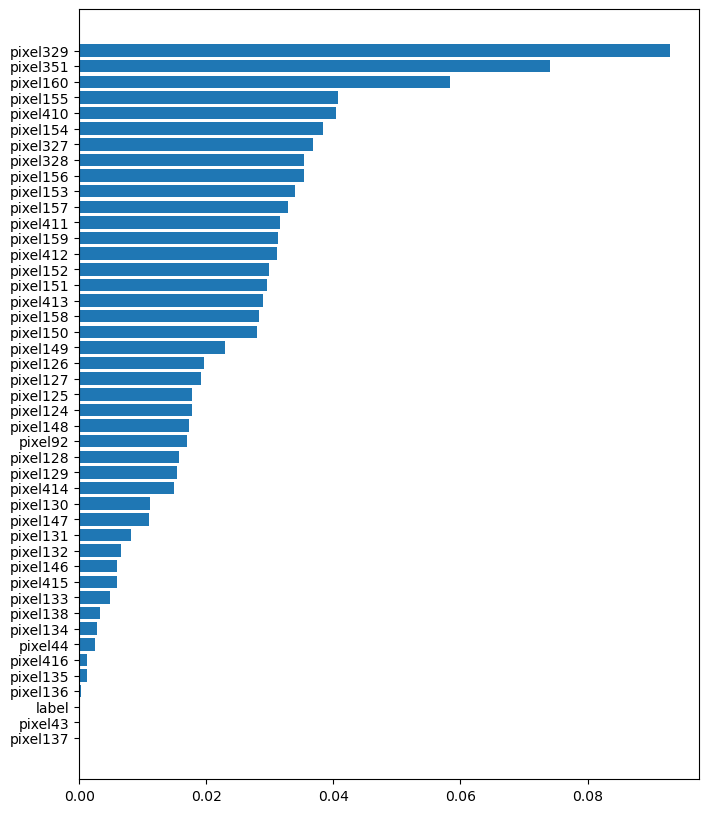

In [38]:
#important Features
feature_cols= list(mb.columns)

importances = rf_model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(8, 10))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels([feature_cols[i] for i in indices])

In [19]:
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp = MLPClassifier(hidden_layer_sizes = (50, 50, 50), activation = 'relu', solver = 'adam', max_iter = 5000)

mlp.fit(X_train, y_train)

mlp.score(X_test,y_test)

0.6901164230864504

In [20]:
mlp_predict = mlp.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, mlp_predict))
print(classification_report(y_test,mlp_predict))

[[734   2  51   6   8  11  18  12   7  15]
 [  1 852   4   3   5   8   5   2  16   6]
 [ 33  11 529 100  12  14  14  29  81  17]
 [  8  14  63 512  10  61   8  24 116  40]
 [ 16  45  10   9 436  19  25 149  27  87]
 [  7   8   8  78  15 350  46  47  25  37]
 [ 10   8   7   4  19  27 724   0   5   0]
 [  3   4   8  14  25   6   0 540  10 162]
 [  6  32  57 115   3  31  10  21 497  39]
 [ 18   8   8  20  11   8   0 279  31 398]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       864
           1       0.87      0.94      0.90       902
           2       0.71      0.63      0.67       840
           3       0.59      0.60      0.60       856
           4       0.80      0.53      0.64       823
           5       0.65      0.56      0.61       621
           6       0.85      0.90      0.88       804
           7       0.49      0.70      0.58       772
           8       0.61      0.61      0.61       811
           9       0.50     

In [25]:
print('Mean Squared Error(MSE):%.2f' % mean_squared_error(mlp_predict, y_test))

Mean Squared Error(MSE):4.51
